# Standardizing and whitening data

This is done to make variance 1 and remove correlelation between columns. Standardize enforces variance 1.  This is generally used to preprocess data before appying in NNs

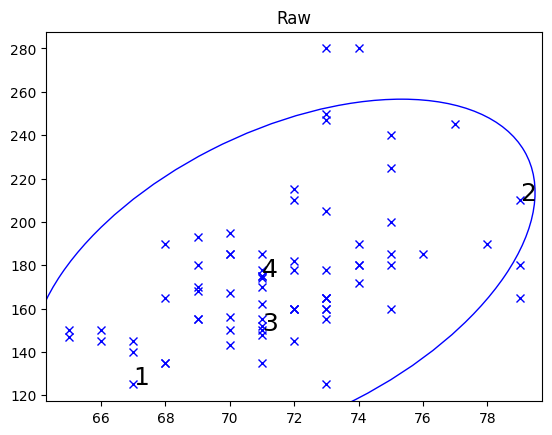

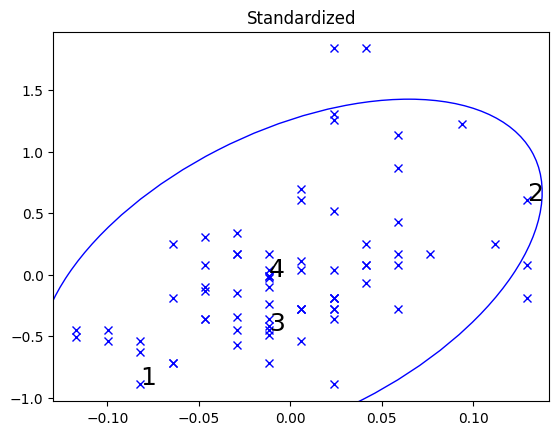

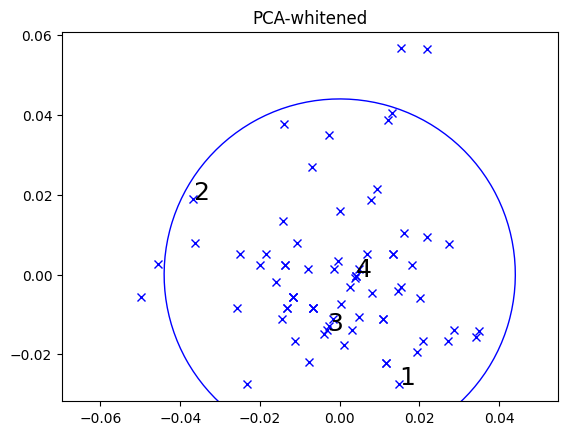

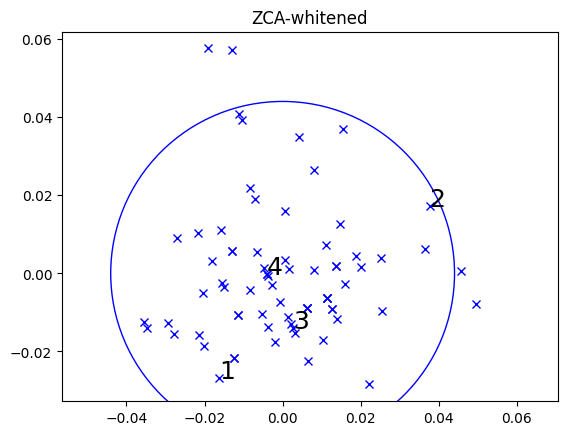

In [29]:
# Author: Peter Cerno <petercerno@gmail.com>
# Plot of:
#   (a) Raw height/weight data.
#   (b) Standardized.
#   (c) PCA whitened.
#   (d) ZCA whitened.
# Based on:
#   https://github.com/probml/pmtk3/blob/master/demos/heightWeightWhiten.m
# Some source code taken from:
#   https://github.com/probml/pyprobml/blob/master/book/gauss_height_weight_plot.py


import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

data = "heightWeight.mat"
dataAll = scipy.io.loadmat(data)


def draw_ell(ax, cov, xy, color):
    u, v = np.linalg.eigh(cov)
    angle = np.arctan2(v[0][1], v[0][0])
    angle = 180 * angle / np.pi
    # here we time u2 with 5, assume 95% are in this ellipse
    u2 = 5 * (u**0.5)
    # print('width and height')
    # print(tuple(xy), u2[0], u2[1], angle)
    e = Ellipse(tuple(xy), u2[0], u2[1], angle=angle)
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_facecolor("none")
    e.set_edgecolor(color)


data = dataAll["heightWeightData"]
y_vec = data[:, 0]  # 1=male, 2=female
x_mat = data[:, [1, 2]]  # height, weight
x_mat = x_mat[y_vec == 1, :]  # select males only
sigma = np.cov(x_mat.T)
mu = np.array([np.mean(x_mat, axis=0)]).T

# Standardize

xs_mat = (x_mat.T - mu).T / np.std(x_mat)
# PCA Whiten

d_vec, e_mat = np.linalg.eigh(sigma)
d_mat = np.diag(d_vec)

w_pca_mat = np.dot(np.sqrt(np.linalg.inv(d_mat)), e_mat.T)
xw_pca_mat = np.dot(w_pca_mat, xs_mat.T).T
# ZCA Whiten

w_zca_mat = np.dot(e_mat, np.dot(np.sqrt(np.linalg.inv(d_mat)), e_mat.T))
xw_zca_mat = np.dot(w_zca_mat, xs_mat.T).T

mat_list = [x_mat, xs_mat, xw_pca_mat, xw_zca_mat]
ax_titles = ["Raw", "Standardized", "PCA-whitened", "ZCA-whitened"]
ax_indices = [(0, 0), (0, 1), (1, 0), (1, 1)]

# fig, axes = plt.subplots(2, 2)
for i in range(4):
    mat = mat_list[i]
    fig, ax = plt.subplots()
    # ax = axes[ax_indices[i][0], ax_indices[i][1]]
    if i > 1:
        ax.set_aspect("equal", "datalim")
    ax.plot(mat[:, 0], mat[:, 1], "bx")
    for j in range(min(mat.shape[0], 4)):
        ax.text(mat[j, 0], mat[j, 1], str(j + 1), size=18)
    draw_ell(ax, np.cov(mat.T), np.mean(mat, axis=0), "blue")
    ttl = ax_titles[i]
    ax.set_title(ttl, fontsize=12)

# plt.subplots_adjust(hspace=0.3, wspace=0.3)
# pml.savefig('heightWeightWhitenZCA.pdf')
plt.show()